# Simple Landscape

In this tutorial we will setup a landscape with one-type dwells and two traps. We will then update the traps positions and add a third one to showcase how [MGSurvE](https://github.com/Chipdelmal/MGSurvE) handles the creation of these objects.

As usual, we begin by loading our packages and setting up our paths:

In [2]:
# Fix PROJ path ---------------------------------------------------------------
import os; 
os.environ['PROJ_LIB']=r'/opt/conda/pkgs/proj-9.2.1-ha5fc9e9_0/share/proj'
# Load libraries --------------------------------------------------------------
import numpy as np
import pandas as pd
import MGSurvE as srv
import matplotlib.pyplot as plt
# Setup data path and ID ------------------------------------------------------
(ID, OUT_PTH) = ('simpleLanscape', './out/')
srv.makeFolder(OUT_PTH)

## Creating Sites

[MGSurvE](https://github.com/Chipdelmal/MGSurvE) takes a dataframe as input for the mosquito dwells. One of the simplest ways to generate one from scratch is to create a dictionary with the position and type of the points, and then pass it directly to the [Pandas Dataframe](https://pandas.pydata.org/docs/reference/frame.html) constructor:

In [3]:
pts = {
    'x': (0.0, 2.0, 2.5, 1.0),
    'y': (0.0, 0.5, 1.5, 3.0),
    't': (0, 0, 0, 0)
}
points = pd.DataFrame(pts)
points

,x,y,t
0,0.0,0.0,0
1,2.0,0.5,0
2,2.5,1.5,0
3,1.0,3.0,0


## Creating Traps

Same as for our sites, we define the traps by generating a dictionary of positions, types, and "fixed" (or immovable) identifiers; and then we go on to define our trap attraction kernels in a separate dictionary, which will map our trap types to their corresponding kernel:

In [4]:
trp = {
   'x': (2.5, 0),
   'y': (0.7, 3),
   'f': (False, False),
   't': (0, 0)
}
traps = pd.DataFrame(trp)
# Define attraction kernel shape ----------------------------------------------
tKernels = {
   0: {
      'kernel': srv.exponentialDecay, 
      'params': {'A': 0.5, 'b': 2}
   }
}
traps

,x,y,f,t
0,2.5,0.7,False,0
1,0.0,3.0,False,0


## Generating and Plotting Landscape

With our parts in place, we instantate our landscape as follows:

[(<Figure size 1000x1000 with 2 Axes>, <AxesSubplot:>),
 (<Figure size 1000x1000 with 2 Axes>,
  <AxesSubplot:title={'center':'Time to Capture: 6.54'}>)]

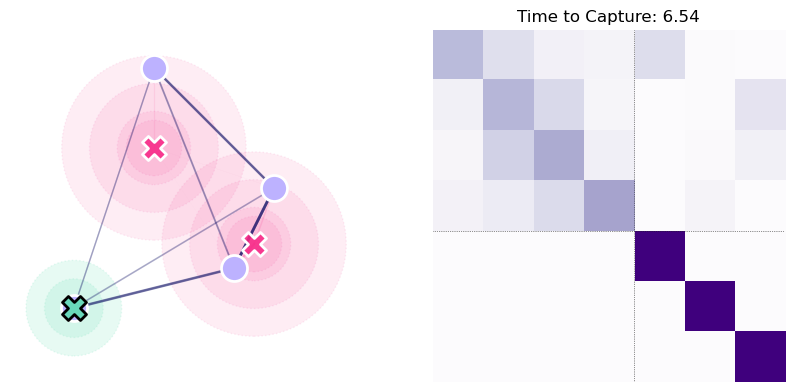

In [31]:
# Land creation ---------------------------------------------------------------
lnd = srv.Landscape(
    points, 
    traps=traps, trapsKernels=tKernels,
    kernelParams={'params': srv.SHORT_EXP_PARAMS, 'zeroInflation': .5}
)
lnd.calcFundamentalMatrix()
fit = lnd.getDaysTillTrapped({'inner': np.sum, 'outer': np.mean})
# Plots -----------------------------------------------------------------------
(fig, ax) = plt.subplots(1, 2, figsize=(10, 10), sharey=False)
lnd.plotSites(fig, ax[0])
lnd.plotMigrationNetwork(fig, ax[0])
lnd.plotTraps(fig, ax[0])
lnd.plotTrapsNetwork(fig, ax[0])
srv.plotMatrix(fig, ax[1], lnd.trapsMigration, lnd.trapsNumber)
ax[1].set_title(f'Time to Capture: {fit:.2f}')
[srv.plotClean(fig, i, frame=False) for i in ax]

We can also have a look at our mosquito movement kernel:

Text(0, 0.5, 'Probability')

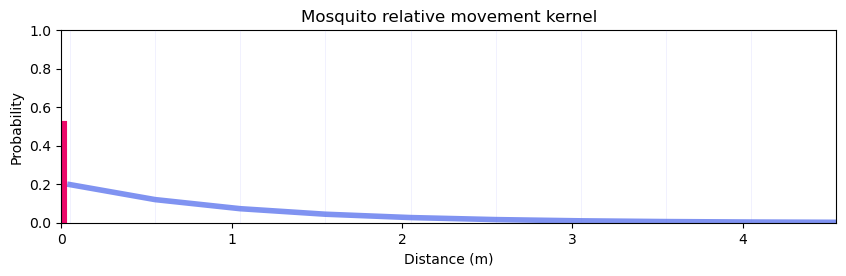

In [32]:
# Mosquito movement kernel ----------------------------------------------------
(maxRange, samples) = (5, 10)
x = np.array(list(np.arange(0.05, maxRange, maxRange/samples)))
(fig, ax) = plt.subplots(1, 1, figsize=(10, 2.5), sharey=False)
(fig, ax) = srv.plotMovementKernel(fig, ax, x, lnd)
ax.set_ylim(0, 1)
ax.set_title(f'Mosquito relative movement kernel')
ax.set_xlabel("Distance (m)")
ax.set_ylabel("Probability")

## Updating Traps

Making changes to traps is relatively simple. We just need to make the necessary changes to our dictionaries, and pass them to the `updateTraps` function:

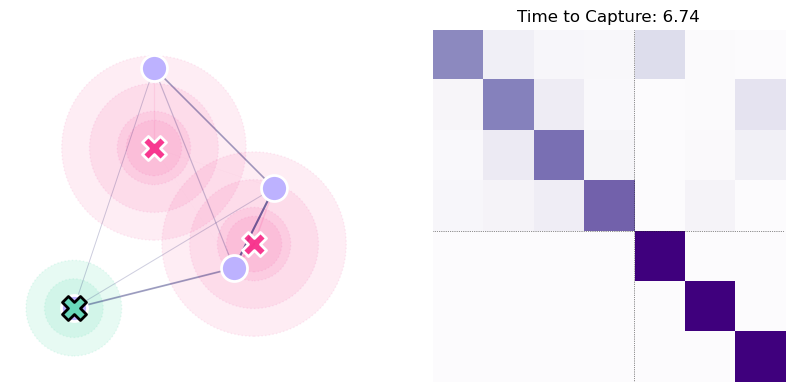

In [7]:
traps = pd.DataFrame({
    'x': [0.0, 1.0, 2.25],
    'y': [0.0, 2.0, 0.8],
    't': [1, 0, 0],
    'f': [1, 0, 0]
})
tKernels = {
    0: {'kernel': srv.exponentialDecay, 'params': {'A': .50, 'b': 2}},
    1: {'kernel': srv.exponentialDecay, 'params': {'A': .30, 'b': 3}}
}
lnd.updateTraps(traps, tKernels)
lnd.calcFundamentalMatrix()
fit = lnd.getDaysTillTrapped({'inner': np.sum, 'outer': np.mean})
# Plots -----------------------------------------------------------------------
(fig, ax) = plt.subplots(1, 2, figsize=(10, 10), sharey=False)
lnd.plotSites(fig, ax[0])
lnd.plotMigrationNetwork(fig, ax[0])
lnd.plotTraps(fig, ax[0])
lnd.plotTrapsNetwork(fig, ax[0])
srv.plotMatrix(fig, ax[1], lnd.trapsMigration, lnd.trapsNumber)
ax[1].set_title(f'Time to Capture: {fit:.2f}')
[srv.plotClean(fig, i, frame=False) for i in ax]
fig.savefig(
    os.path.join(OUT_PTH, '{}.png'.format(ID)), 
    facecolor='w', bbox_inches='tight', pad_inches=0.1, dpi=150
)

And let's plot our traps' profiles!

Text(0, 0.5, 'Attractiveness')

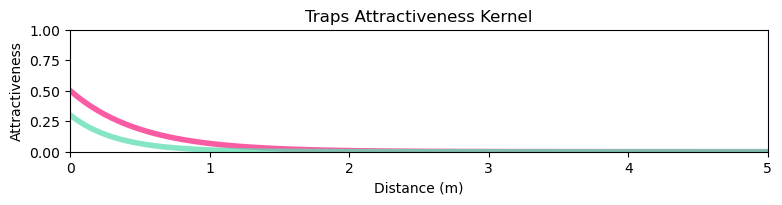

In [22]:
(fig, ax) = plt.subplots(1, 1, figsize=(9, 3), sharey=False)
(fig, ax) = srv.plotTrapsKernels(fig, ax, lnd, distRange=(0, 5), aspect=.175)
ax.set_title("Traps Attractiveness Kernel")
ax.set_xlabel("Distance (m)")
ax.set_ylabel("Attractiveness")

<hr>

# More Information

* [Quickstart](https://chipdelmal.github.io/MGSurvE/build/html/Quickstart.html)
* [Landscape Creation](https://chipdelmal.github.io/MGSurvE/build/html/landscapeCreation.html)
* Doc's Examples: [creation](https://chipdelmal.github.io/MGSurvE/build/html/landscapeCreation.html), [update](https://chipdelmal.github.io/MGSurvE/build/html/landscapeUpdate.html)